# CREDIT CARD FRAUD DETECTION

#### This project focuses on identifying fraudulent credit card transactions using machine learning models. The goal is to distinguish between legitimate and fraudulent transactions by analyzing patterns in transaction data and improving model performance for accuracy, precision, and recall.

# Data Analysis

In [2]:
import pandas as pd

In [15]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [8]:
data_train = pd.read_csv("/content/drive/MyDrive/fraudTrain.csv")
data_test = pd.read_csv("/content/drive/MyDrive/fraudTest.csv")
df=pd.concat([data_train, data_test])

In [9]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [19]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,5.371934e+05,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,3.669110e+05,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,2.315490e+05,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,4.630980e+05,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,8.335758e+05,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud               i

In [12]:
print("Null values:")
print(df.isnull().sum())


Null values:
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [13]:
df.duplicated().sum()

0

In [14]:
fraud=df[df["is_fraud"]==1]
not_fraud=df[df["is_fraud"]==0]
print(fraud.shape[0])
print(not_fraud.shape[0])


9651
1842743


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_

<ipython-input-15-b1f8f7988c49>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='is_fraud', palette='coolwarm')


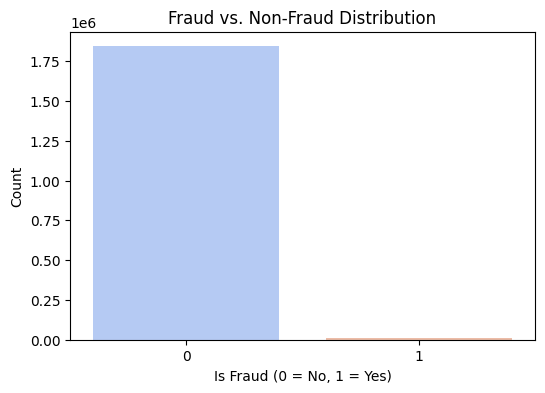

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Basic Information
print("Dataset Information:")
print(df.info())

# Missing Values
print("\nMissing Values per Column:")
print(df.isnull().sum())

# Duplicates
print("\nNumber of Duplicate Rows:", df.duplicated().sum())

# Target Distribution
print("\nTarget Variable (is_fraud) Distribution:")
print(df['is_fraud'].value_counts(normalize=True) * 100)

# Visualize Class Distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='is_fraud', palette='coolwarm')
plt.title("Fraud vs. Non-Fraud Distribution")
plt.xlabel("Is Fraud (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


<ipython-input-25-1da8eabeeefc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_fraud.index, y=category_fraud.values, palette="Reds_r")


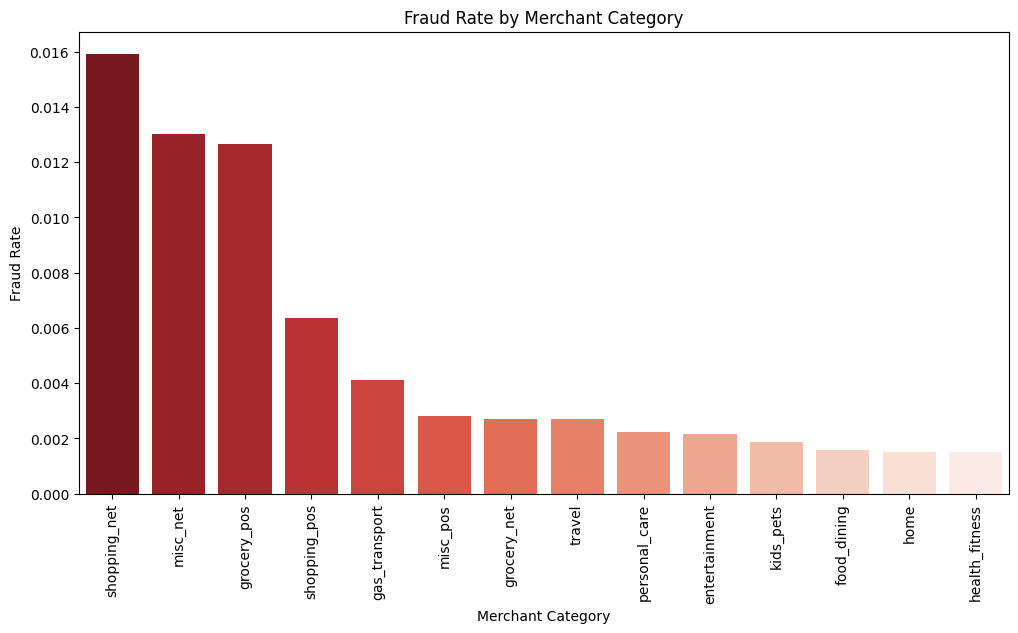

In [25]:
category_fraud = df.groupby('category')['is_fraud'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=category_fraud.index, y=category_fraud.values, palette="Reds_r")
plt.title("Fraud Rate by Merchant Category")
plt.xlabel("Merchant Category")
plt.ylabel("Fraud Rate")
plt.xticks(rotation=90)
plt.show()


<ipython-input-26-a87103c76ec4>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_summary_filtered['state'], y=state_summary_filtered['Fraud_Rate'], palette="Blues_r")


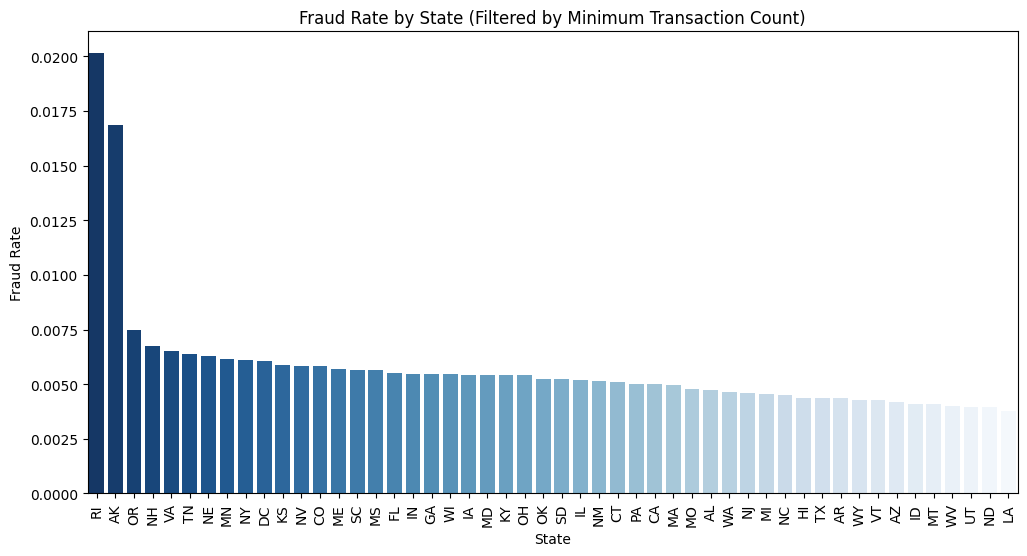

In [26]:
# Fraud rate by state with count filtering
state_counts = df['state'].value_counts()  # Number of transactions per state
state_fraud = df.groupby('state')['is_fraud'].mean()  # Fraud rate per state

# Combine counts and fraud rates into a DataFrame
state_summary = pd.DataFrame({
    'Fraud_Rate': state_fraud,
    'Transaction_Count': state_counts
}).reset_index().rename(columns={"index": "state"})  # Correct key

# Filter states with at least 100 transactions
state_summary_filtered = state_summary[state_summary['Transaction_Count'] > 100]

# Sort by Fraud Rate
state_summary_filtered = state_summary_filtered.sort_values(by='Fraud_Rate', ascending=False)

# Plot the cleaned fraud rate
plt.figure(figsize=(12,6))
sns.barplot(x=state_summary_filtered['state'], y=state_summary_filtered['Fraud_Rate'], palette="Blues_r")
plt.title("Fraud Rate by State (Filtered by Minimum Transaction Count)")
plt.xlabel("State")
plt.ylabel("Fraud Rate")
plt.xticks(rotation=90)
plt.show()


In [20]:
# Feature Extraction
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['transaction_hour'] = df['trans_date_trans_time'].dt.hour
df['transaction_day'] = df['trans_date_trans_time'].dt.day
df['transaction_month'] = df['trans_date_trans_time'].dt.month


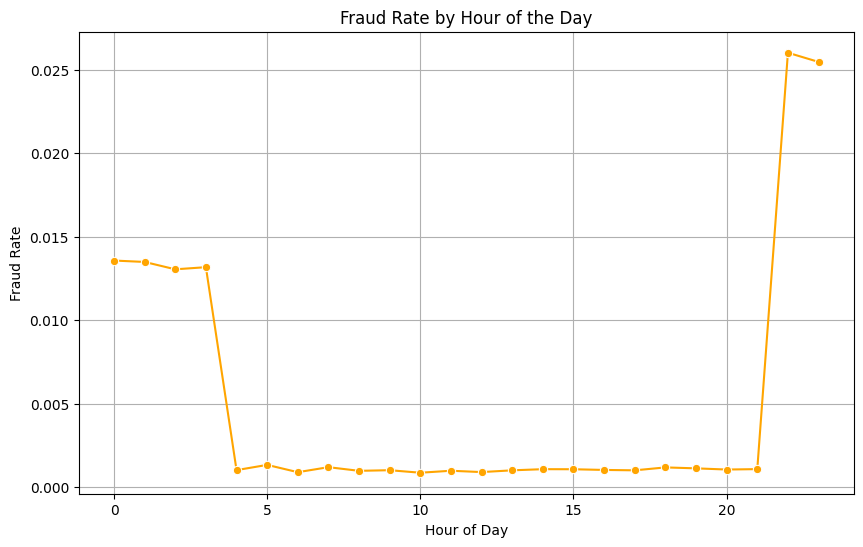

In [21]:
hourly_fraud_rate = df.groupby('transaction_hour')['is_fraud'].mean()

plt.figure(figsize=(10,6))
sns.lineplot(x=hourly_fraud_rate.index, y=hourly_fraud_rate.values, marker="o", color="orange")
plt.title("Fraud Rate by Hour of the Day")
plt.xlabel("Hour of Day")
plt.ylabel("Fraud Rate")
plt.grid(True)
plt.show()


<ipython-input-22-95b60c7c0dde>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_fraud_rate.index, y=monthly_fraud_rate.values, palette="Purples_r")


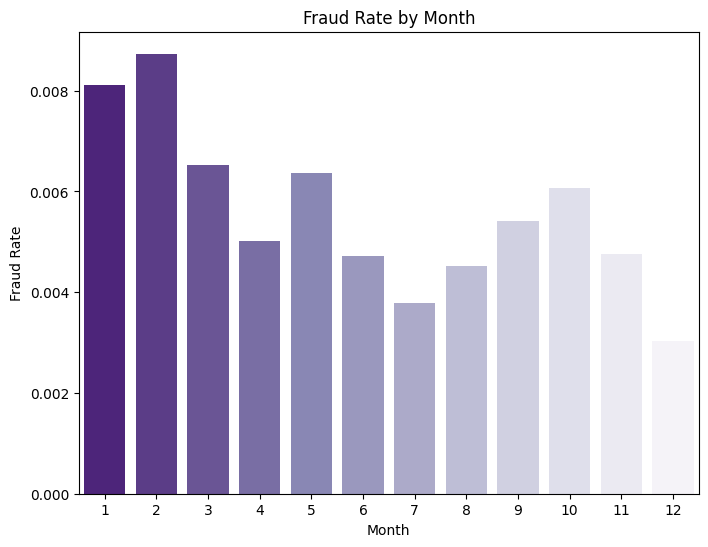

In [22]:
monthly_fraud_rate = df.groupby('transaction_month')['is_fraud'].mean()

plt.figure(figsize=(8,6))
sns.barplot(x=monthly_fraud_rate.index, y=monthly_fraud_rate.values, palette="Purples_r")
plt.title("Fraud Rate by Month")
plt.xlabel("Month")
plt.ylabel("Fraud Rate")
plt.show()


<ipython-input-23-730985724774>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mi_df['Mutual Information'], y=mi_df['Feature'], palette="viridis")


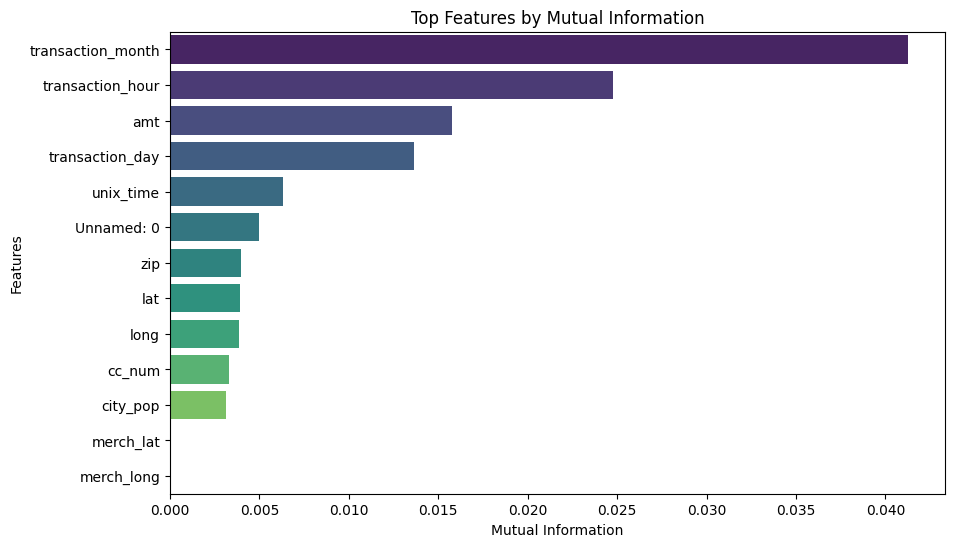

In [23]:
from sklearn.feature_selection import mutual_info_classif

# Prepare Numeric Features
X_numeric = df.select_dtypes(include=[np.number]).drop(columns=['is_fraud'])
y = df['is_fraud']

# Compute Mutual Information
mi = mutual_info_classif(X_numeric, y, random_state=42)
mi_df = pd.DataFrame({
    'Feature': X_numeric.columns,
    'Mutual Information': mi
}).sort_values(by='Mutual Information', ascending=False)

# Visualize Top Features
plt.figure(figsize=(10,6))
sns.barplot(x=mi_df['Mutual Information'], y=mi_df['Feature'], palette="viridis")
plt.title("Top Features by Mutual Information")
plt.xlabel("Mutual Information")
plt.ylabel("Features")
plt.show()


# Data Preprocessing

## Feature Selection / Extraction

In [ ]:
#Calculating age from date of birth
df['dob'] = pd.to_datetime(df['dob'], errors='coerce')
df['age'] = (pd.Timestamp.now() - df['dob']).dt.days // 365
df = df.drop(columns=['dob'])

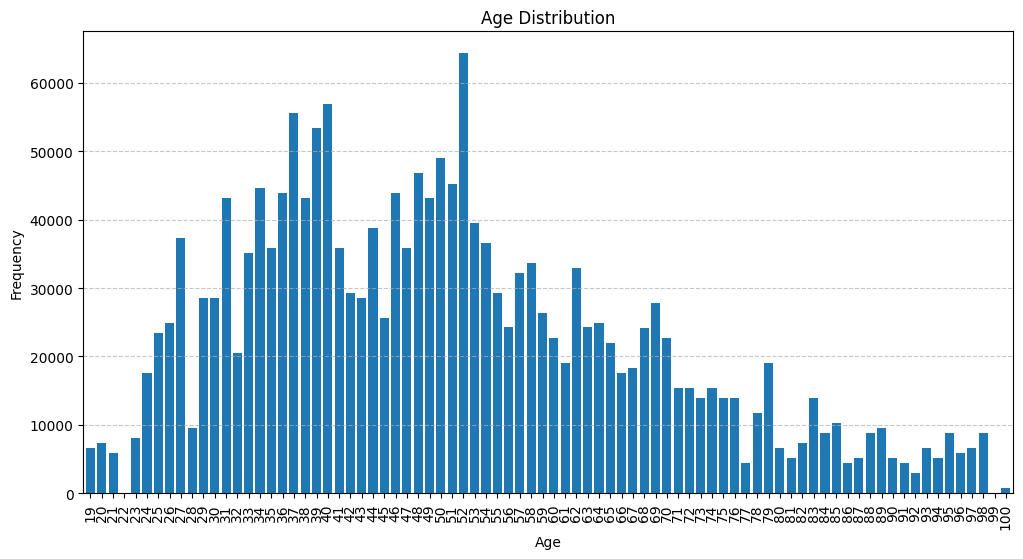

age
19     6586
20     7303
21     5833
22       12
23     8082
       ... 
96     5852
97     6601
98     8783
99       11
100     735
Name: count, Length: 82, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

age_counts = df['age'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
age_counts.plot(kind='bar', width=0.8)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print(age_counts)


In [ ]:
# Extracting day, month, and hour from the datetime column to create new features

df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['transaction_day'] = df['trans_date_trans_time'].dt.day
df['transaction_month'] = df['trans_date_trans_time'].dt.month
df['transaction_hour'] = df['trans_date_trans_time'].dt.hour
df = df.drop(columns=['trans_date_trans_time'])

In [ ]:
# This calculates the difference between each transaction's amount ('amt') and the average transaction amount within its respective 'category'.
# It helps to detect anomalies where the transaction deviates significantly from the category's usual transaction behavior.

df['amt_category_deviation'] = df['amt'] - df.groupby('category')['amt'].transform('mean')

In [ ]:
# This computes the difference between the current transaction amount ('amt') and the previous transaction amount for each credit card number ('cc_num').

df['amt_diff_from_last'] = df.groupby('cc_num')['amt'].diff()

In [ ]:
# This binary feature indicates whether the transaction occurred at night.
# Transactions between 12:00 AM - 6:00 AM (early morning) or after 10:00 PM
# are labeled as 1 (night), otherwise 0 (not night).

df['is_night'] = df['transaction_hour'].apply(lambda x: 1 if x < 6 or x > 22 else 0)

In [ ]:
# This feature calculates the average transaction amount ('amt') for each 'category'
# and assigns it to all transactions within that category.

df['category_amt_interaction'] = df.groupby('category')['amt'].transform('mean')

In [ ]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

categorical_cols = df.select_dtypes(include=['object']).columns

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
#Removing unnecessary features
drop_columns = ['Unnamed: 0','first', 'last','cc_num', 'trans_num',]
df = df.drop(columns=drop_columns)

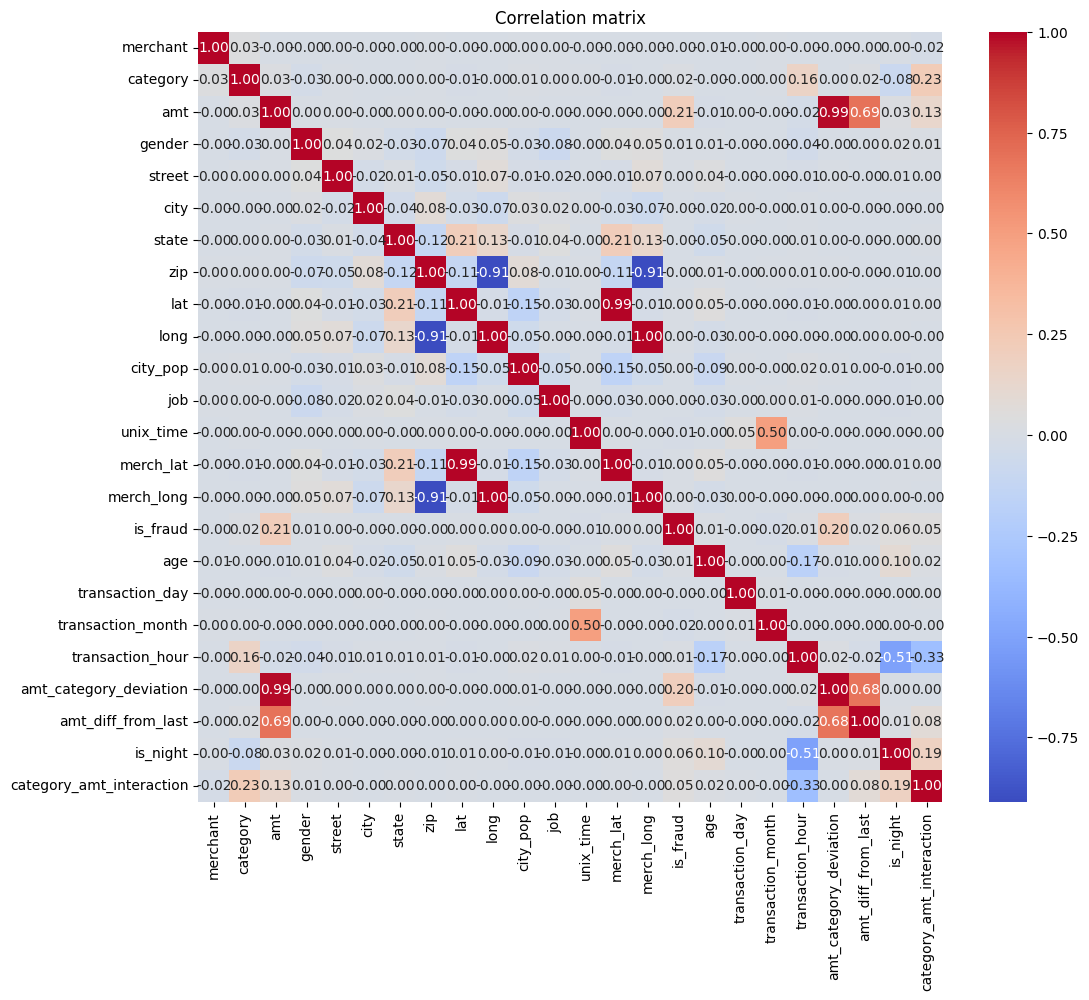

In [ ]:
#Correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation matrix")
plt.show()

In [ ]:
#Scaler
from sklearn.preprocessing import StandardScaler

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
numerical_cols = numerical_cols.drop('is_fraud')

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [ ]:
from sklearn.model_selection import train_test_split
y = df['is_fraud']
X = df.drop(columns=['is_fraud'])

# Veri setini ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Removing low importance columns
low_importance_cols = ['zip', 'lat', 'long', 'merchant', 'unix_time']
df = df.drop(columns=low_importance_cols)

# Model Training

In [ ]:
from sklearn.model_selection import train_test_split

y = df['is_fraud']
X = df.drop(columns=['is_fraud'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#to store metrics
results = []


In [ ]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

rf_accuracy = accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred, average="macro")
rf_recall = recall_score(y_test, y_pred, average="macro")
rf_f1 = f1_score(y_test, y_pred, average="macro")
results.append(["Random Forest", rf_accuracy, rf_precision, rf_recall, rf_f1])

KeyboardInterrupt: 

In [ ]:
#XGBoost
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import xgboost as xgb
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

xgb_model = xgb.XGBClassifier(eval_metric='logloss')

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

xgb_accuracy = accuracy_score(y_test, y_pred)
xgb_precision = precision_score(y_test, y_pred, average="macro")
xgb_recall = recall_score(y_test, y_pred, average="macro")
xgb_f1 = f1_score(y_test, y_pred, average="macro")
results.append(["XGBoost", xgb_accuracy, xgb_precision, xgb_recall, xgb_f1])

Accuracy: 0.9993197995028058

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368549
           1       0.97      0.90      0.93      1930

    accuracy                           1.00    370479
   macro avg       0.98      0.95      0.97    370479
weighted avg       1.00      1.00      1.00    370479


Confusion Matrix:
[[368493     56]
 [   196   1734]]


In [ ]:
import matplotlib.pyplot as plt

feature_importances = xgb_model.feature_importances_
plt.bar(X_train.columns, feature_importances)
plt.xticks(rotation=90)
plt.title("Feature Importances")
plt.show()

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

X = df.drop(columns=['is_fraud'])
y = df['is_fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
y_pred_tree = decision_tree_model.predict(X_test)
y_proba_tree = decision_tree_model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))

dt_accuracy = accuracy_score(y_test, y_pred_tree)
dt_precision = precision_score(y_test, y_pred_tree, average="macro")
dt_recall = recall_score(y_test, y_pred_tree, average="macro")
dt_f1 = f1_score(y_test, y_pred_tree, average="macro")

results.append(["Decision Tree", dt_accuracy, dt_precision, dt_recall, dt_f1])

In [ ]:
#Catboost
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

catboost_model = CatBoostClassifier(random_state=42, verbose=0)

catboost_model.fit(X_train, y_train)

y_pred_catboost = catboost_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_catboost))
print("\nClassification Report:\n", classification_report(y_test, y_pred_catboost))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_catboost))

catboost_accuracy = accuracy_score(y_test, y_pred_catboost)
catboost_precision = precision_score(y_test, y_pred_catboost, average="macro")
catboost_recall = recall_score(y_test, y_pred_catboost, average="macro")
catboost_f1 = f1_score(y_test, y_pred_catboost, average="macro")
results.append(["CatBoost", catboost_accuracy, catboost_precision, catboost_recall, catboost_f1])

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# LightGBM Model
lgbm_model = LGBMClassifier(random_state=42)

# Train the model
lgbm_model.fit(X_train, y_train)

# Predictions
y_pred_lgbm = lgbm_model.predict(X_test)

# Evaluation
print("LightGBM:")
print("Accuracy:", accuracy_score(y_test, y_pred_lgbm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lgbm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lgbm))

lgbm_accuracy = accuracy_score(y_test, y_pred_lgbm)
lgbm_precision = precision_score(y_test, y_pred_lgbm, average="macro")
lgbm_recall = recall_score(y_test, y_pred_lgbm, average="macro")
lgbm_f1 = f1_score(y_test, y_pred_lgbm, average="macro")
results.append(["LightGBM", lgbm_accuracy, lgbm_precision, lgbm_recall, lgbm_f1])

[LightGBM] [Info] Number of positive: 7698, number of negative: 1474217
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.086730 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2525
[LightGBM] [Info] Number of data points in the train set: 1481915, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005195 -> initscore=-5.254922
[LightGBM] [Info] Start training from score -5.254922
LightGBM:
Accuracy: 0.9980160818831837

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    368526
           1       0.80      0.83      0.81      1953

    accuracy                           1.00    370479
   macro avg       0.90      0.91      0.91    370479
weighted avg       1.00      1.00      1.00    370479


Confusion Matrix:
 [[368127    399]
 [   336   

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.impute import SimpleImputer
import numpy as np

# Check for missing values (Optional: helps you see which columns have NaN values)
print("Missing values in X_train before imputation:")
print(X_train.isnull().sum())
print("Missing values in X_test before imputation:")
print(X_test.isnull().sum())

# Using SimpleImputer for missing values
# strategy='mean' replaces NaN with the mean of the column
# You can also use 'median' or 'most_frequent' depending on your data
imputer = SimpleImputer(strategy='mean')

# Fit the imputer only on the training set, then transform both train and test sets
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model
# We use X_train_imputed and y_train here because X_train_imputed no longer contains NaN values
log_reg_model.fit(X_train_imputed, y_train)

# Make predictions on the test set
y_pred_log = log_reg_model.predict(X_test_imputed)

# Evaluate model performance
print("Logistic Regression Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

# Save the results
lr_accuracy = accuracy_score(y_test, y_pred_log)
lr_precision = precision_score(y_test, y_pred_log, average="macro")
lr_recall = recall_score(y_test, y_pred_log, average="macro")
lr_f1 = f1_score(y_test, y_pred_log, average="macro")

results.append(["Logistic Regression", lr_accuracy, lr_precision, lr_recall, lr_f1])


Missing values in X_train before imputation:
category                      0
amt                           0
gender                        0
street                        0
city                          0
state                         0
city_pop                      0
job                           0
merch_lat                     0
merch_long                    0
age                           0
transaction_day               0
transaction_month             0
transaction_hour              0
amt_category_deviation        0
amt_diff_from_last          814
is_night                      0
category_amt_interaction      0
dtype: int64
Missing values in X_test before imputation:
category                      0
amt                           0
gender                        0
street                        0
city                          0
state                         0
city_pop                      0
job                           0
merch_lat                     0
merch_long                    0
ag

In [ ]:
# Neural Network Example
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# IMPORTANT: Before running this code, ensure that X_train_imputed, X_test_imputed, y_train, and y_test are prepared.
# If your data has missing values, use something like SimpleImputer beforehand.
# Also, consider using a scaler (e.g., StandardScaler) to preprocess your data if needed.

# Define the model architecture: A simple MLP
model = Sequential()
model.add(Dense(64, input_dim=X_train_imputed.shape[1], activation='relu'))  # First hidden layer with 64 neurons
model.add(Dropout(0.2))  # Dropout to reduce overfitting
model.add(Dense(32, activation='relu'))  # Second hidden layer with 32 neurons
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification (sigmoid activation)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model
# validation_split=0.2: 20% of the training data is used as validation data
model.fit(X_train_imputed, y_train, epochs=5, batch_size=256, validation_split=0.2, verbose=1)

# Make predictions on the test data
y_pred_prob = model.predict(X_test_imputed)
y_pred = (y_pred_prob > 0.5).astype('int')

# Evaluate the model's performance
print("Neural Network Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
4631/4631 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9946 - loss: 0.0257 - val_accuracy: 0.9971 - val_loss: 0.0125
Epoch 2/5
4631/4631 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.9971 - loss: 0.0125 - val_accuracy: 0.9979 - val_loss: 0.0097
Epoch 3/5
4631/4631 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9975 - loss: 0.0100 - val_accuracy: 0.9979 - val_loss: 0.0085
Epoch 4/5
4631/4631 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9978 - loss: 0.0092 - val_accuracy: 0.9980 - val_loss: 0.0081
Epoch 5/5
4631/4631 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9978 - loss: 0.0090 - val_accuracy: 0.9981 - val_loss: 0.0077
11578/11578 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step
Neural Network Model Performance:
Accuracy: 0.998237416965604
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    368549
           1       0.95      0.70      0.81      1930

    accuracy                           1.00    370479


In [ ]:
# Autoencoder
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Assumptions:
# X: Feature matrix (NumPy array or DataFrame)
# y: Target label (0: Normal, 1: Fraud)

# Filter only normal transactions
X_normal = X[y == 0]
X_fraud = X[y == 1]

# Split normal data into train and test subsets
X_train_norm, X_test_norm = train_test_split(X_normal, test_size=0.2, random_state=42)

# For evaluation, combine the normal test set with fraud samples
X_test = np.concatenate([X_test_norm, X_fraud], axis=0)
y_test = np.concatenate([np.zeros(len(X_test_norm)), np.ones(len(X_fraud))], axis=0)

# Autoencoder architecture
input_dim = X_train_norm.shape[1]  # Number of features
encoding_dim = 16  # Latent space dimension (adjust as needed)

input_layer = Input(shape=(input_dim,))
encoded = Dense(32, activation='relu')(input_layer)
encoded = Dense(encoding_dim, activation='relu')(encoded)  # Latent representation

decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(input_dim, activation='linear')(decoded)  # Output should reconstruct the input

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer=Adam(), loss='mse')

# Train the model only on normal data
history = autoencoder.fit(X_train_norm, X_train_norm,
                          epochs=10,
                          batch_size=256,
                          shuffle=True,
                          validation_split=0.2)

# Use the trained autoencoder to reconstruct the test data
reconstructions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - reconstructions, 2), axis=1)

# Determine a threshold based on the reconstruction error of normal samples
# For instance, take the 95th percentile of the normal distribution's error
threshold = np.percentile(mse[y_test == 0], 95)

y_pred = (mse > threshold).astype(int)

print("Threshold:", threshold)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Epoch 1/10
4607/4607 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: nan - val_loss: nan
Epoch 2/10
4607/4607 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - loss: nan - val_loss: nan
Epoch 3/10
4607/4607 ━━━━━━━━━━━━━━━━━━━━ 27s 6ms/step - loss: nan - val_loss: nan
Epoch 4/10
4607/4607 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: nan - val_loss: nan
Epoch 5/10
4607/4607 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: nan - val_loss: nan
Epoch 6/10
4607/4607 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: nan - val_loss: nan
Epoch 7/10
4607/4607 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: nan - val_loss: nan
Epoch 8/10
4607/4607 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: nan - val_loss: nan
Epoch 9/10
4607/4607 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: nan - val_loss: nan
Epoch 10/10
4607/4607 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: nan - val_loss: nan
11819/11819 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step
Threshold: nan
Confusion Matrix:
 [[368549      0]
 [  9651      0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.99    368549
         1.0       0.00      0.00      0.00      9651

    accuracy                           0.97    378200
   macro avg       0.49      0.50      0.49    378200
weighted avg       0.95      0.97      0.96    378200

Accuracy: 0.9744817556848229


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

base_models = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('xgb', XGBClassifier(eval_metric='logloss', random_state=42))
]

meta_model = LogisticRegression()

stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

stacking_clf.fit(X_train, y_train)

y_pred_stack = stacking_clf.predict(X_test)

print("Stacking Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_stack))
print("\nClassification Report:\n", classification_report(y_test, y_pred_stack))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_stack))

stacking_accuracy = accuracy_score(y_test, y_pred_stack)
stacking_precision = precision_score(y_test, y_pred_stack, average="macro")
stacking_recall = recall_score(y_test, y_pred_stack, average="macro")
stacking_f1 = f1_score(y_test, y_pred_stack, average="macro")

results.append(["Stacking Classifier", stacking_accuracy, stacking_precision, stacking_recall, stacking_f1])

In [ ]:
import pandas as pd

columns = ["Model", "Accuracy", "Precision", "Recall", "F1-Score"]
results_df = pd.DataFrame(results, columns=columns)

results_df[["Accuracy", "Precision", "Recall", "F1-Score"]] = results_df[["Accuracy", "Precision", "Recall", "F1-Score"]].round(2)

styled_table = results_df.style.set_caption("Model Performance Comparison") \
                               .background_gradient(cmap="YlGnBu", subset=["Accuracy", "Precision", "Recall", "F1-Score"]) \
                               .format("{:.2f}", subset=["Accuracy", "Precision", "Recall", "F1-Score"]) \
                               .set_properties(**{"text-align": "center"}) \
                               .set_table_styles([
                                   {'selector': 'caption',
                                    'props': [('font-size', '14px'), ('font-weight', 'bold'), ('color', '#2f4f4f')]}
                               ])

from IPython.display import display
display(styled_table)
